# Statistics

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Some of what we've already had

In [8]:
def get_data(symbols, dates):
    df1 = pd.DataFrame(index=dates)
    dfSPY = pd.read_csv("data/SPY.csv", 
                        index_col="Date", 
                        parse_dates=True, 
                        usecols=["Date", "Adj Close"], 
                        na_values=["nan"])
    dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    df1 = df1.join(dfSPY, how="inner")
    df1 = df1.dropna()
    for symbol in symbols:
        df_temp = pd.read_csv("data/{}.csv".format(symbol), index_col="Date", 
                        parse_dates=True, 
                        usecols=["Date", "Adj Close"], 
                        na_values=["nan"])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp)
    return df1

def normalize_data(df):
    # We will divide it by the first day
    return df / df.iloc[0,:]

def plot_data(df, title="Stock Prices"):
    ax = df.plot(title=title, fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # must be called to show 

## Global statistics

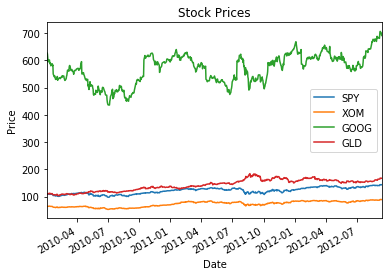

Mean
SPY     121.711206
XOM      73.296221
GOOG    568.941941
GLD     142.603279
dtype: float64

Median
SPY     123.305
XOM      76.440
GOOG    578.845
GLD     146.440
dtype: float64

STD
SPY     11.626556
XOM     10.168104
GOOG    54.068129
GLD     20.562938
dtype: float64


In [14]:
dates = pd.date_range("2010-01-01", "2012-12-31")
symbols = ["XOM", "GOOG", "GLD"]
df = get_data(symbols, dates)
plot_data(df)

# Compute global mean
print("Mean")
print(df.mean())
print()

# Compute global median
print("Median")
print(df.median())
print()

# Compute global std
print("STD")
print(df.std())

## Rolling statistics

Instead of getting the whole dataframe, we get only a window of values and compute statistics for it

Example: mean of 20 days and get the mean, move the window one day forward and compute the mean for the 20 days (that is called moving average, show in image below)

![Moving Average](https://upload.wikimedia.org/wikipedia/commons/d/d9/MovingAverage.GIF)

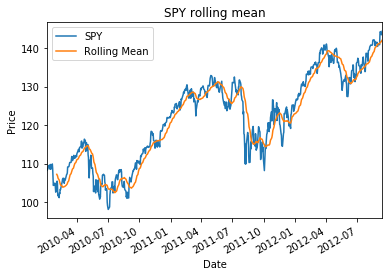

In [22]:
# Plot SPY data, retain matplotlib axis object
ax = df["SPY"].plot(title="SPY rolling mean", label="SPY")

# Compute rolling mean using 20 days
rm_SPY = df["SPY"].rolling(20).mean()

# Add rolling mean to same plot
rm_SPY.plot(label="Rolling Mean", ax=ax)

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc="upper left")
plt.show()

## Bolling bands

A Bollinger Band® is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the security's price, but can be adjusted to user preferences. 

![Image of Yaktocat](https://www.investopedia.com/thmb/gvlXmWskHGDZvNuPRNQdkxO-DY0=/1543x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/BollingerBands-5c535dc646e0fb00013a1b8b.png)

## Daily returns

Stock prices change on a daily basis, altering the value of your investments. You may calculate daily stock returns to monitor the magnitude of this change. The daily return measures the dollar change in a stock’s price as a percentage of the previous day’s closing price. A positive return means the stock has grown in value, while a negative return means it has lost value. A stock with lower positive and negative daily returns is typically less risky than a stock with higher daily returns, which create larger swings in value.
We can generate daily returns chart, based on returns for every day of the stock
![Image](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSYYp3-QDTtyE9tgQjjCsrU-2Ccdi-f63MlazOqGFvji0q_FICh)

We can analyse and compare two stocks daily returns values

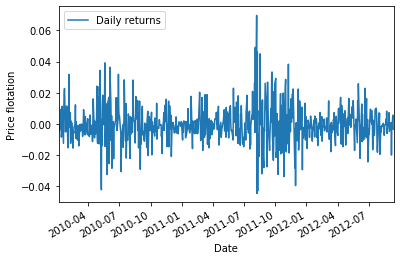

In [27]:
# Compute daily returns
dr_SPY = df["SPY"][:-1].values / df["SPY"][1:] - 1

# Add daily returns to the plot
ax = dr_SPY.plot(label="Daily returns")

# Add axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Price flotation")
ax.legend(loc="upper left")
plt.show()